In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv("dataset\cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft,Furnished_status_Semi-Furnished,Furnished_status_Unfurnished
0,0,5600000.0,1350.0,28.608850,77.460560,3.0,3.0,New Property,Flat,4148.148148,False,False
1,1,8800000.0,1490.0,28.374236,76.952416,3.0,3.0,New Property,Flat,5906.040268,True,False
2,2,16500000.0,2385.0,28.645769,77.385110,4.0,5.0,New Property,Flat,6918.238994,False,True
3,3,3810000.0,1050.0,28.566914,77.436434,2.0,2.0,New Property,Flat,3628.571429,False,True
4,4,6200000.0,1350.0,28.520732,77.356491,2.0,2.0,Resale,Flat,4592.592593,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       7738 non-null   int64  
 1   price                            7738 non-null   float64
 2   area                             7738 non-null   float64
 3   latitude                         7738 non-null   float64
 4   longitude                        7738 non-null   float64
 5   Bedrooms                         7738 non-null   float64
 6   Bathrooms                        7738 non-null   float64
 7   neworold                         7738 non-null   object 
 8   type_of_building                 7738 non-null   object 
 9   Price_sqft                       7738 non-null   float64
 10  Furnished_status_Semi-Furnished  7738 non-null   bool   
 11  Furnished_status_Unfurnished     7738 non-null   bool   
dtypes: bool(2), float64(

In [10]:

# df.drop(columns=["Unnamed: 0"],inplace=True)
df.info()
df.to_csv("dataset/cleaned2.csv")
# X = df.drop(columns=["price","Unnamed: 0"],axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   price                            7738 non-null   float64
 1   area                             7738 non-null   float64
 2   latitude                         7738 non-null   float64
 3   longitude                        7738 non-null   float64
 4   Bedrooms                         7738 non-null   float64
 5   Bathrooms                        7738 non-null   float64
 6   neworold                         7738 non-null   object 
 7   type_of_building                 7738 non-null   object 
 8   Price_sqft                       7738 non-null   float64
 9   Furnished_status_Semi-Furnished  7738 non-null   bool   
 10  Furnished_status_Unfurnished     7738 non-null   bool   
dtypes: bool(2), float64(7), object(2)
memory usage: 559.3+ KB


In [29]:
X.head()

,area,latitude,longitude,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft,Furnished_status_Semi-Furnished,Furnished_status_Unfurnished
0,1350.0,28.608850,77.460560,3.0,3.0,New Property,Flat,4148.148148,False,False
1,1490.0,28.374236,76.952416,3.0,3.0,New Property,Flat,5906.040268,True,False
2,2385.0,28.645769,77.385110,4.0,5.0,New Property,Flat,6918.238994,False,True
3,1050.0,28.566914,77.436434,2.0,2.0,New Property,Flat,3628.571429,False,True
4,1350.0,28.520732,77.356491,2.0,2.0,Resale,Flat,4592.592593,False,False


In [30]:
y = df["price"]

In [31]:
y

0        5600000.0
1        8800000.0
2       16500000.0
3        3810000.0
4        6200000.0
           ...    
7733     7900000.0
7734     4510000.0
7735     7000000.0
7736     6500000.0
7737     6500000.0
Name: price, Length: 7738, dtype: float64

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer

# numeric_transformer = StandardScaler()
# oh_transformer = OneHotEncoder()

# preprocessor = ColumnTransformer(
#     [
#         ("OneHotEncoder", oh_transformer, cat_features),
#          ("StandardScaler", numeric_transformer, num_features),        
#     ]
# )
print(num_features)
print(cat_features)


Index(['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms',
       'Price_sqft', 'Furnished_status_Semi-Furnished',
       'Furnished_status_Unfurnished'],
      dtype='object')
Index(['neworold', 'type_of_building'], dtype='object')


In [33]:
X = preprocessor.fit_transform(X)

In [34]:
X.shape()

TypeError: 'tuple' object is not callable

In [35]:
X.shape

(7738, 12)

In [36]:
X

array([[ 1.        ,  0.        ,  1.        , ..., -0.57941041,
        -0.6300818 , -0.43473918],
       [ 1.        ,  0.        ,  1.        , ...,  0.15045857,
         1.58709553, -0.43473918],
       [ 1.        ,  0.        ,  1.        , ...,  0.57071898,
        -0.6300818 ,  2.30022975],
       ...,
       [ 0.        ,  1.        ,  1.        , ..., -0.77042337,
        -0.6300818 , -0.43473918],
       [ 0.        ,  1.        ,  1.        , ..., -0.37400944,
        -0.6300818 , -0.43473918],
       [ 1.        ,  0.        ,  1.        , ..., -0.75954816,
        -0.6300818 , -0.43473918]])

In [37]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6190, 12), (1548, 12))

In [38]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [39]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 1793089.7347
- Mean Absolute Error: 983298.9544
- R2 Score: 0.9362
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2215779.9804
- Mean Absolute Error: 1025765.9328
- R2 Score: 0.9172


Lasso
Model performance for Training set
- Root Mean Squared Error: 1793044.5295
- Mean Absolute Error: 983761.4361
- R2 Score: 0.9362
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2215882.0217
- Mean Absolute Error: 1025906.6862
- R2 Score: 0.9172


Ridge
Model performance for Training set
- Root Mean Squared Error: 1793045.2866
- Mean Absolute Error: 983444.1753
- R2 Score: 0.9362
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2216074.7375
- Mean Absolute Error: 1025618.1611
- R2 Score: 0.9172


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Abso

In [40]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
4,Random Forest Regressor,0.994843
5,XGBRegressor,0.990417
3,Decision Tree,0.985928
0,Linear Regression,0.917183
1,Lasso,0.917176
2,Ridge,0.917161


In [41]:
randomForest_model = RandomForestRegressor()
randomForest_model = randomForest_model.fit(X_train,y_train)
y_pred = randomForest_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.44


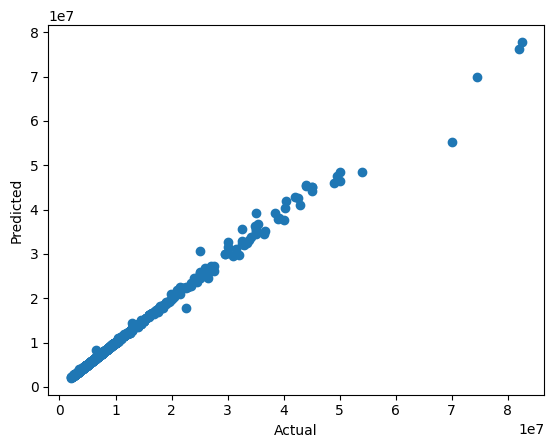

In [42]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [43]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1720,4200000.0,4207100.0,-7100.0
748,13500000.0,13536000.0,-36000.0
3915,6900000.0,6884000.0,16000.0
3950,6000000.0,6000000.0,0.0
5942,10000000.0,9950000.0,50000.0
...,...,...,...
3838,7700000.0,7623000.0,77000.0
221,5800000.0,5823600.0,-23600.0
267,8000000.0,7994700.0,5300.0
107,7500000.0,7511800.0,-11800.0
